In [97]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        

def plot_3d(image, fig,ax,threshold=-300): 
    p = image#image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    return fig,ax

In [105]:
from data.load_dataset import give_dataset
import numpy as np 
dataset,_=give_dataset('oasis','test', batch_size=1,
                                                num_workers=4,
                                                shuffle=True,
                                                debug=False,
                                                preprocessing='full',
                                                task='age',
                                                share=1.0,
                                                balance=False)
x,y=next(iter(dataset))

['MR_ID', 'Subject', 'Age', 'Scanner', 'Scans', 'FreeSurfers', 'PUPs', 'Date', 'T1_path', 'ADRC_ADRCCLINICALDATA ID', 'Date_after_clinical', 'AgeBasedOnClinicalData']
Loading share 1.00  test data.


In [106]:
x=x.squeeze()
x=x.numpy()
threshold=1.5*x.mean()
x_ab,y_ab,z_ab=x.shape
#Cut out one 
# for idx in range(int(x_ab/4),x_ab):
#     for idy in range(0,int(3*y_ab/4)):
#         for idz in range(int(z_ab/4),z_ab):
#             x[idx,idy,idz]=0.0
#x=np.flip(x, 1)


/gpfs3/users/win-fmrib-analysis/lhw539/python/tlneuro-ivybridge/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19


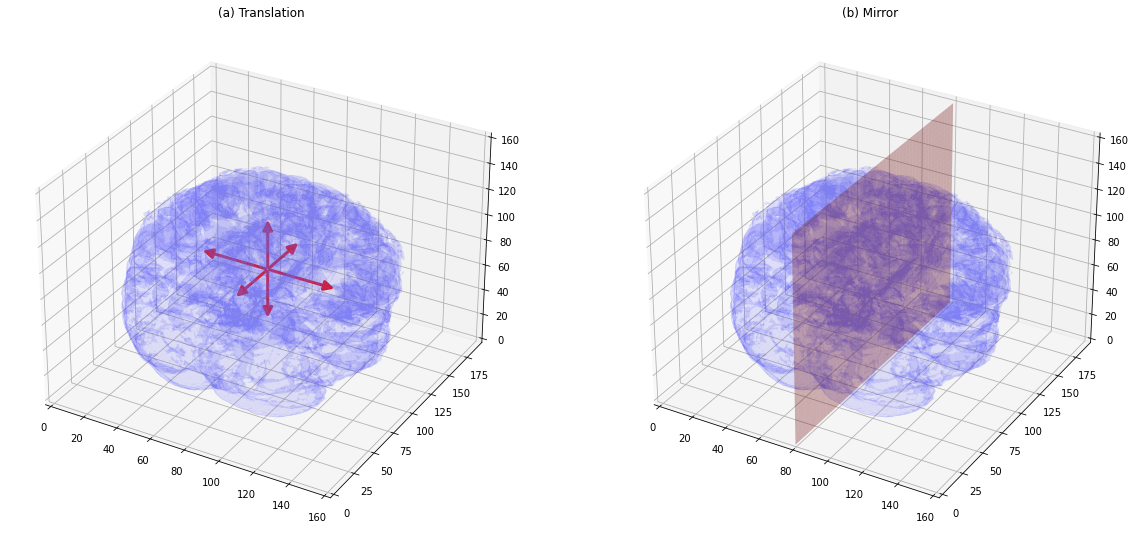

In [128]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("(a) Translation")
plot_3d(x,fig,ax1,threshold)

arrow_length=40

for fac in [-1,1]:
    a = Arrow3D([x.shape[0]/2,x.shape[0]/2+fac*arrow_length], [x.shape[1]/2, x.shape[1]/2], 
                [x.shape[2]/2,x.shape[2]/2], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r",label='x')
    ax1.add_artist(a)
    b = Arrow3D([x.shape[0]/2,x.shape[0]/2], [x.shape[1]/2, x.shape[1]/2+fac*arrow_length], 
               [x.shape[2]/2,x.shape[2]/2], mutation_scale=20, 
               lw=3, arrowstyle="-|>", color="r",label='y')
    ax1.add_artist(b)
    c = Arrow3D([x.shape[0]/2,x.shape[0]/2], [x.shape[1]/2, x.shape[1]/2], 
                [x.shape[2]/2,x.shape[2]/2+fac*arrow_length], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r",label='z')
    ax1.add_artist(c)

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("(b) Mirror")
surf=ax2.plot_surface(X, Y, Z, alpha=0.3,color='r')
plot_3d(x,fig,ax2,threshold)
x_grid = np.linspace(-1,x.shape[1],int(x.shape[1]))
y_grid = np.linspace(-1,x.shape[2],int(x.shape[2]))

Y,Z = np.meshgrid(x_grid,y_grid)
X=x.shape[0]/2 + 0*Y + 0*Z

fig.show()
plt.savefig("visualization/plots/data_augmentation_plot.png")